# LSTM Time Series Forecasting for NAB random signal

In [1]:
from tensorflow import keras

## Dataset

https://archive.ics.uci.edu/ml/datasets/Air+quality#

In [2]:
import pandas as pd
import numpy as np

df_raw = pd.read_csv("datasets/NAB-art_daily_small_noise.csv")

In [3]:
df_raw.head()

,timestamp,value
0,2014-04-01 00:00:00,18.324919
1,2014-04-01 00:05:00,21.970327
2,2014-04-01 00:10:00,18.624806
3,2014-04-01 00:15:00,21.953684
4,2014-04-01 00:20:00,21.909120


In [4]:
df_raw.isna().sum()

timestamp    0
value        0
dtype: int64

In [5]:
df = df_raw.dropna()
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [6]:
df.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [7]:
df.columns

Index(['timestamp', 'value'], dtype='object')

In [8]:
df["timestamp"] 

0      2014-04-01 00:00:00
1      2014-04-01 00:05:00
2      2014-04-01 00:10:00
3      2014-04-01 00:15:00
4      2014-04-01 00:20:00
               ...        
4027   2014-04-14 23:35:00
4028   2014-04-14 23:40:00
4029   2014-04-14 23:45:00
4030   2014-04-14 23:50:00
4031   2014-04-14 23:55:00
Name: timestamp, Length: 4032, dtype: datetime64[ns]

## Visualize Data

In [9]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9.5, 6]

<IPython.core.display.Javascript object>


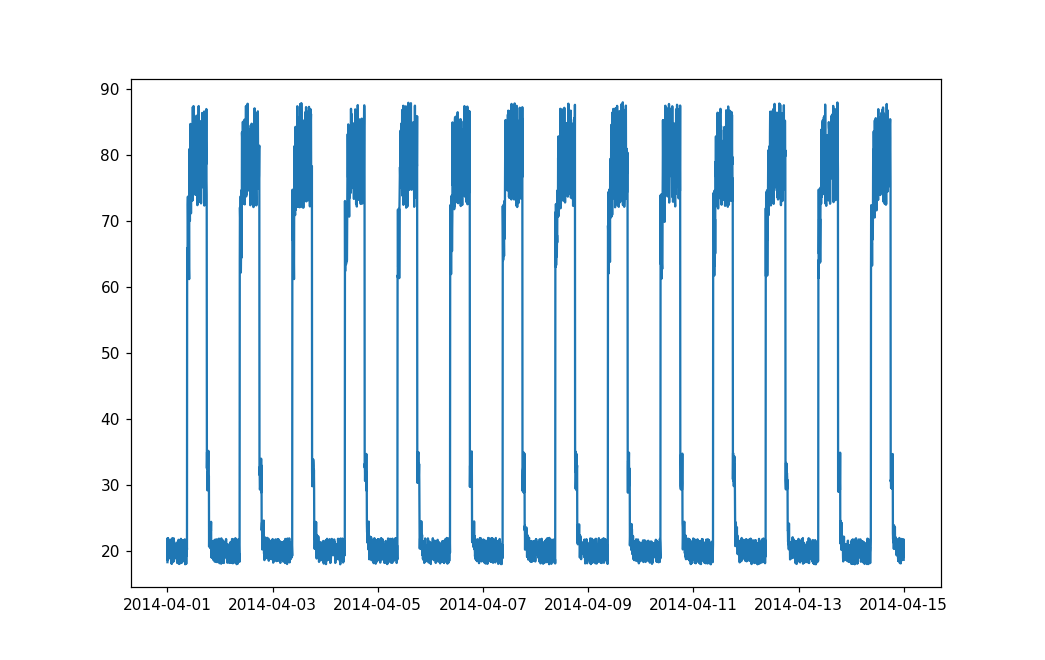

c:\users\mcama\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [10]:
figure = plt.figure()

plt.plot(df["timestamp"], df["value"])

## Normalize Data

In [11]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

In [12]:
# scaler.fit(df["value"].values.reshape(-1,1))

In [13]:
# scaled_data = scaler.transform(df["value"].values.reshape(-1,1))

In [14]:
# scaled_data

In [15]:
# df["scaled"] = scaled_data

In [16]:
# df

## Split Dataset
Use the Keras TimeseriesGenerator to transform the dataframe into training and testing portions

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [18]:
input_length = 40
batch_size = 10

X_input = df['value']
generator = TimeseriesGenerator(X_input, X_input, length=input_length, batch_size=batch_size)
len(generator)

400

In [19]:
generator[0]

(array([[18.32491854, 21.97032718, 18.62480603, 21.95368398, 21.90911973,
         21.17527242, 20.63769185, 20.3112282 , 21.46440618, 19.15775809,
         19.87072485, 20.47755988, 19.6447619 , 19.70994582, 19.32113867,
         20.25692727, 21.40229811, 18.80611351, 21.73773215, 20.75635061,
         21.29309285, 20.22476277, 21.11806681, 18.06480159, 21.2735217 ,
         18.16055544, 21.55965351, 21.96785099, 19.17626985, 18.84127423,
         21.06145346, 19.01210536, 21.46224953, 18.41137037, 18.50382079,
         21.91660622, 20.69535559, 21.3875489 , 19.29731751, 20.705935  ],
        [21.97032718, 18.62480603, 21.95368398, 21.90911973, 21.17527242,
         20.63769185, 20.3112282 , 21.46440618, 19.15775809, 19.87072485,
         20.47755988, 19.6447619 , 19.70994582, 19.32113867, 20.25692727,
         21.40229811, 18.80611351, 21.73773215, 20.75635061, 21.29309285,
         20.22476277, 21.11806681, 18.06480159, 21.2735217 , 18.16055544,
         21.55965351, 21.96785099, 19

In [20]:
generator[1]

(array([[19.87072485, 20.47755988, 19.6447619 , 19.70994582, 19.32113867,
         20.25692727, 21.40229811, 18.80611351, 21.73773215, 20.75635061,
         21.29309285, 20.22476277, 21.11806681, 18.06480159, 21.2735217 ,
         18.16055544, 21.55965351, 21.96785099, 19.17626985, 18.84127423,
         21.06145346, 19.01210536, 21.46224953, 18.41137037, 18.50382079,
         21.91660622, 20.69535559, 21.3875489 , 19.29731751, 20.705935  ,
         20.37696731, 20.41260048, 20.73012984, 20.30143669, 19.71624948,
         19.10369078, 21.07432532, 18.90508972, 20.76941722, 18.93333129],
        [20.47755988, 19.6447619 , 19.70994582, 19.32113867, 20.25692727,
         21.40229811, 18.80611351, 21.73773215, 20.75635061, 21.29309285,
         20.22476277, 21.11806681, 18.06480159, 21.2735217 , 18.16055544,
         21.55965351, 21.96785099, 19.17626985, 18.84127423, 21.06145346,
         19.01210536, 21.46224953, 18.41137037, 18.50382079, 21.91660622,
         20.69535559, 21.3875489 , 19

In [21]:
input_length = 200
batch_size = 20
num_features = 1

X = X_input.values.reshape(X_input.shape[0], 1)

generator = TimeseriesGenerator(X, X, length=input_length, batch_size=batch_size)
len(generator)

192

## Create Model

In [22]:
from keras import Sequential
from keras.layers import Dense, LSTM, TimeDistributed
from keras.optimizers import RMSprop, Adam

In [23]:
model = Sequential()
model.add(LSTM(100, input_shape=(input_length, num_features), return_sequences=True))
model.add(LSTM(100, input_shape=(input_length, num_features)))
model.add(Dense(num_features, activation='relu'))
optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200, 100)          40800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit_generator(generator, steps_per_epoch=len(generator), epochs=5)

Epoch 1/5
192/192 [==============================] - 53s 276ms/step - loss: 1393.9178
Epoch 2/5
192/192 [==============================] - 53s 276ms/step - loss: 937.4941
Epoch 3/5
192/192 [==============================] - 54s 282ms/step - loss: 829.5692
Epoch 4/5
192/192 [==============================] - 53s 277ms/step - loss: 649.3692
Epoch 5/5
192/192 [==============================] - 52s 273ms/step - loss: 378.6504


## Predict and Create Forecast
Use the entire history to forecast the next data point. Then add that to the history and repeat to generate the 2nd future data point... etc.

In [25]:
steps_to_predict = 300

prediction_timestamps = []
prediction_values = []
start_values = X_input.iloc[-input_length:].copy()
start_times = df['timestamp'].iloc[-input_length:].copy()

for i in range(steps_to_predict):
    
    next_value = model.predict(start_values[-input_length:].values.reshape(1,input_length,1))
    start_values = start_values.append(pd.Series(next_value[0]), ignore_index=True)
    
    next_time = start_times[-1:].values + pd.Timedelta(seconds=60*5)
    start_times = start_times.append(pd.Series(next_time[0]), ignore_index=True)


In [26]:
start_values

0      19.265502
1      21.892579
2      18.774868
3      19.383314
4      19.431365
         ...    
495    21.816711
496    21.816711
497    21.816711
498    21.816711
499    21.816711
Length: 500, dtype: float64

In [27]:
start_times

0     2014-04-14 07:20:00
1     2014-04-14 07:25:00
2     2014-04-14 07:30:00
3     2014-04-14 07:35:00
4     2014-04-14 07:40:00
              ...        
495   2014-04-16 00:35:00
496   2014-04-16 00:40:00
497   2014-04-16 00:45:00
498   2014-04-16 00:50:00
499   2014-04-16 00:55:00
Length: 500, dtype: datetime64[ns]

## Visualize Forecast

<IPython.core.display.Javascript object>


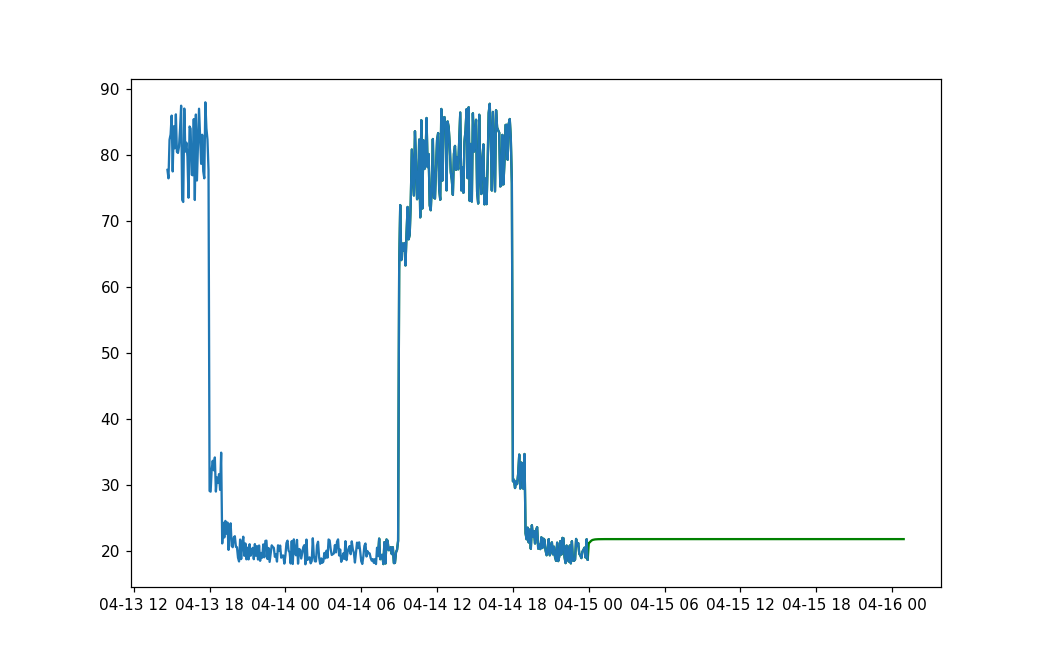

In [28]:
forecast = plt.figure()

plt.plot(start_times, start_values, color='green')
# plt.plot(start_times, scaler.inverse_transform(start_values), color='green')
plt.plot(df["timestamp"].iloc[-400:], X_input.iloc[-400:])
# plt.plot(next_time, next_value, color='green')


Scaling data didn't help... It doesn't seem like LSTMs are great for square waves. I should probably difference the data first since it is so periodic.